# Deep Learning with python - a hands on introduction 
by: Nikhil Ketkar

## Chapter 2

Train RMSE (Degree = 1) 3.4474730639558904
Test RMSE (Degree = 1) 7.626262404498216
Train RMSE (Degree = 2) 0.9003955103036326
Test RMSE (Degree = 2) 0.5247468523224951


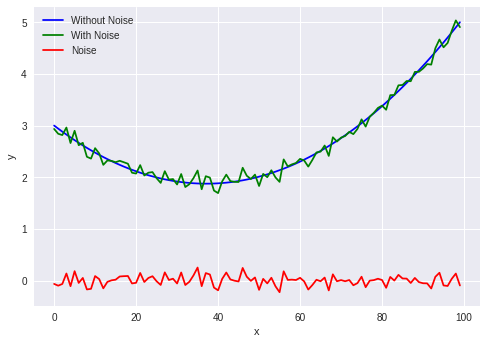

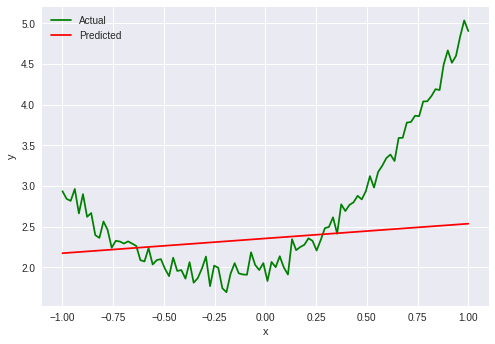

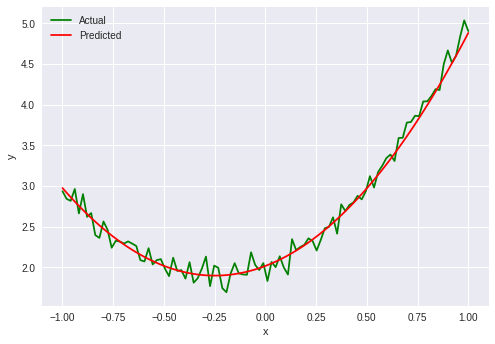

In [2]:
#Generate Toy Dataset
import pylab
import numpy
x = numpy.linspace(-1,1,100)
signal = 2 + x + 2 * x * x
noise = numpy.random.normal(0, 0.1, 100)
y = signal + noise
pylab.plot(signal,'b');
pylab.plot(y,'g')
pylab.plot(noise, 'r')
pylab.xlabel("x")
pylab.ylabel("y")
pylab.legend(["Without Noise", "With Noise", "Noise"], loc = 2)
x_train = x[0:80]
y_train = y[0:80]

# Model with degree 1
pylab.figure()
degree = 2
X_train = numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)])
model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train)),X_train.transpose()),y_train)
pylab.plot(x,y,'g')
pylab.xlabel("x")
pylab.ylabel("y")

predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)])
pylab.plot(x, predicted,'r')
pylab.legend(["Actual", "Predicted"], loc = 2)
train_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80])))
test_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:])))
print("Train RMSE (Degree = 1)", train_rmse1)
print("Test RMSE (Degree = 1)", test_rmse1)

# Model with degree 2
pylab.figure()
degree = 3
X_train = numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)])
model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train)),
X_train.transpose()),y_train)
pylab.plot(x,y,'g')
pylab.xlabel("x")
pylab.ylabel("y")
predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)])
pylab.plot(x, predicted,'r')
pylab.legend(["Actual", "Predicted"], loc = 2)
train_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80],
y_train - predicted[0:80])))
test_rmse1 = numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:],
y[80:] - predicted[80:])))
print("Train RMSE (Degree = 2)", train_rmse1)
print("Test RMSE (Degree = 2)", test_rmse1)

### Regularization

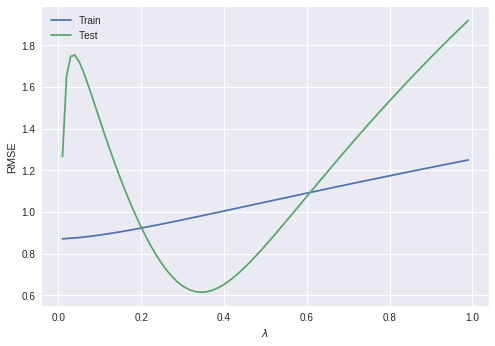

In [1]:

import pylab
import numpy
x = numpy.linspace(-1,1,100)
signal = 2 + x + 2 * x * x
noise = numpy.random.normal(0, 0.1, 100)
y = signal + noise
x_train = x[0:80]
y_train = y[0:80]
train_rmse = []
test_rmse = []
degree = 80
lambda_reg_values = numpy.linspace(0.01,0.99,100)
xrange = len(x_train)

#print( xrange)
#print(xrange(0,degree))

for lambda_reg in lambda_reg_values:
    X_train = numpy.column_stack([numpy.power(x_train,i) for i in range(0,degree)])
    model = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X_train.transpose(),X_train) + lambda_reg * numpy.identity(degree)),X_train.transpose()),y_train)
    predicted = numpy.dot(model, [numpy.power(x,i) for i in range(0,degree)])
    train_rmse.append(numpy.sqrt(numpy.sum(numpy.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))))
    test_rmse.append(numpy.sqrt(numpy.sum(numpy.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))))
pylab.plot(lambda_reg_values, train_rmse)
pylab.plot(lambda_reg_values, test_rmse)
pylab.xlabel(r"$\lambda$")
pylab.ylabel("RMSE")
pylab.legend(["Train", "Test"], loc = 2)